# Dataset Info

Appliance Energy Usage: A Multivariate Time Series Forecasting Example

Experimental data used to create regression models of appliances energy use in a low energy building.
Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).
Original source of the dataset:

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

- date time year-month-day hour:minute:second
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chievres weather station), in Celsius
- Pressure (from Chievres weather station), in mm Hg
- RH_out, Humidity outside (from Chievres weather station), in %
- Wind speed (from Chievres weather station), in m/s
- Visibility (from Chievres weather station), in km
- Tdewpoint (from Chievres weather station), Â°C
- rv1, Random variable 1, nondimensional
- rv2, Random variable 2, nondimensional

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Recognizing and Understanding Data

In [2]:
df = pd.read_csv('energydata_complete.csv',index_col='date', parse_dates = True)

In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,7.027,84.257,17.200,41.627,18.200,48.900,17.033,45.530,6.600,733.500,92.000,7.000,63.000,5.300,13.275,13.275
2016-01-11 17:10:00,60,30,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,6.833,84.063,17.200,41.560,18.200,48.863,17.067,45.560,6.483,733.600,92.000,6.667,59.167,5.200,18.606,18.606
2016-01-11 17:20:00,50,30,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,6.560,83.157,17.200,41.433,18.200,48.730,17.000,45.500,6.367,733.700,92.000,6.333,55.333,5.100,28.643,28.643
2016-01-11 17:30:00,50,40,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,6.433,83.423,17.133,41.290,18.100,48.590,17.000,45.400,6.250,733.800,92.000,6.000,51.500,5.000,45.410,45.410
2016-01-11 17:40:00,60,40,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,6.367,84.893,17.200,41.230,18.100,48.590,17.000,45.400,6.133,733.900,92.000,5.667,47.667,4.900,10.084,10.084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.000,97.695,102.525,10.000,50.000,60.000,100.000,1080.000
lights,19735.000,3.802,7.936,0.000,0.000,0.000,0.000,70.000
T1,19735.000,21.687,1.606,16.790,20.760,21.600,22.600,26.260
RH_1,19735.000,40.260,3.979,27.023,37.333,39.657,43.067,63.360
T2,19735.000,20.341,2.193,16.100,18.790,20.000,21.500,29.857
RH_2,19735.000,40.420,4.070,20.463,37.900,40.500,43.260,56.027
T3,19735.000,22.268,2.006,17.200,20.790,22.100,23.290,29.236
RH_3,19735.000,39.243,3.255,28.767,36.900,38.530,41.760,50.163
T4,19735.000,20.855,2.043,15.100,19.530,20.667,22.100,26.200
RH_4,19735.000,39.027,4.341,27.660,35.530,38.400,42.157,51.090


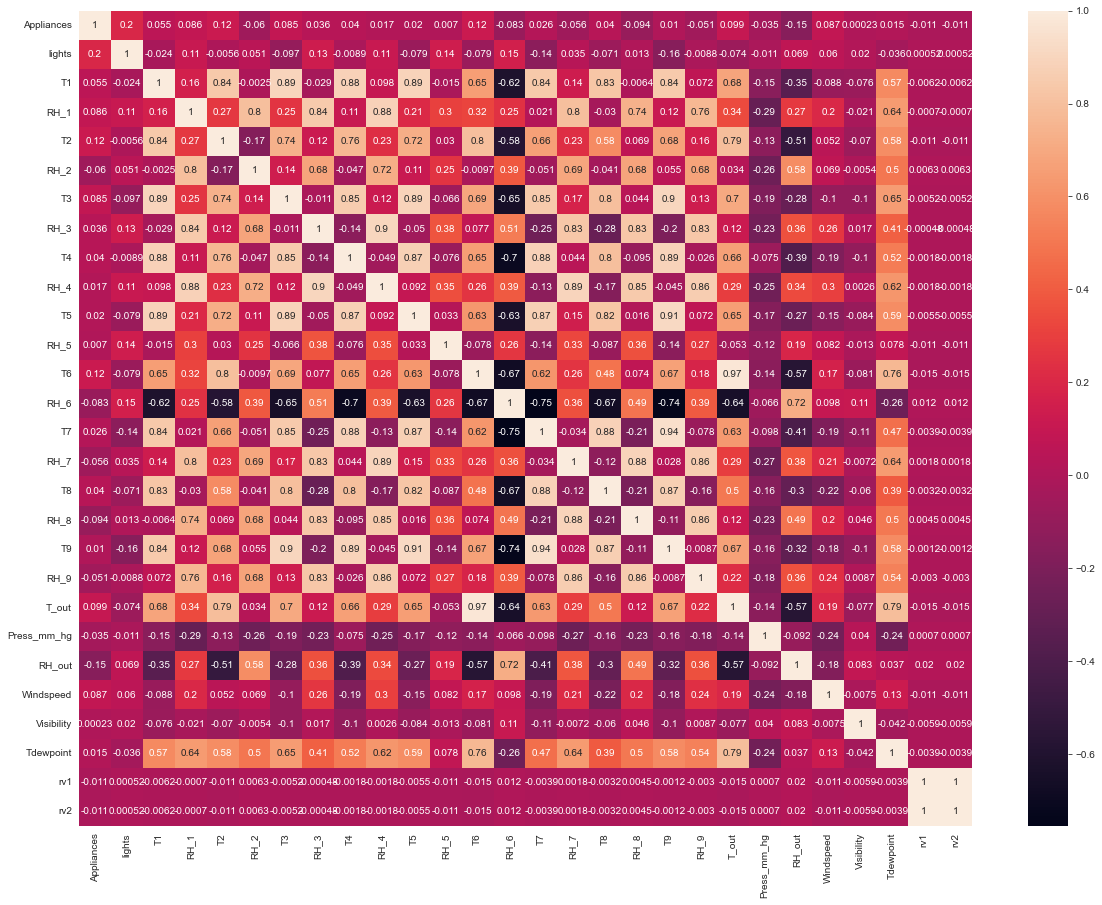

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Data Pre-Processing

## Feature Engineering
- Let's reduce the number of feature
- Let's resample the dataset by hours

In [7]:
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [8]:
df=df.rename(columns = {'T6':'T_outside', 'RH_6':'RH_outside'})
df["T_inside"] = (df["T1"] + df["T2"] + df["T3"] + df["T4"] + df["T5"] + df["T7"] + df["T8"] + df["T9"])/8
df["RH_inside"] = (df["RH_1"] + df["RH_2"] + df["RH_3"] + df["RH_4"] + df["RH_5"] + df["RH_7"] + df["RH_8"] + df["RH_9"])/8

In [9]:
drop_list = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
             'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'rv1', 'rv2']
df.drop(drop_list, axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T_outside    19735 non-null  float64
 3   RH_outside   19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   Windspeed    19735 non-null  float64
 6   Visibility   19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   T_inside     19735 non-null  float64
 9   RH_inside    19735 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.7 MB


In [11]:
df_a = df[["Appliances", "lights"]]
df_b = df.drop(["Appliances", "lights"], axis = 1)

In [12]:
df_a = df_a.resample("H").sum() # 10 dk lık verileri saatlik hale getirdik
df_b = df_b.resample("H").mean()

In [13]:
df = pd.concat([df_a, df_b], axis =1)
df.head()

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,330,210,6.587,84.260,733.750,6.167,53.417,5.050,18.415,46.555
2016-01-11 18:00:00,1060,310,6.180,87.204,734.267,5.417,40.000,4.658,18.408,46.520
2016-01-11 19:00:00,1040,150,5.857,88.131,734.792,6.000,40.000,4.392,18.686,48.665
2016-01-11 20:00:00,750,210,5.469,86.934,735.283,6.000,40.000,4.017,18.941,50.356
2016-01-11 21:00:00,620,140,5.579,86.129,735.567,6.000,40.000,3.817,19.254,48.977


In [14]:
df.shape

(3290, 10)

Let's also round off the data, to one decimal point precision, otherwise this may cause issues with our network (we will also normalize the data anyways, so this level of precision isn't useful to us)

In [15]:
df = df.round(2)

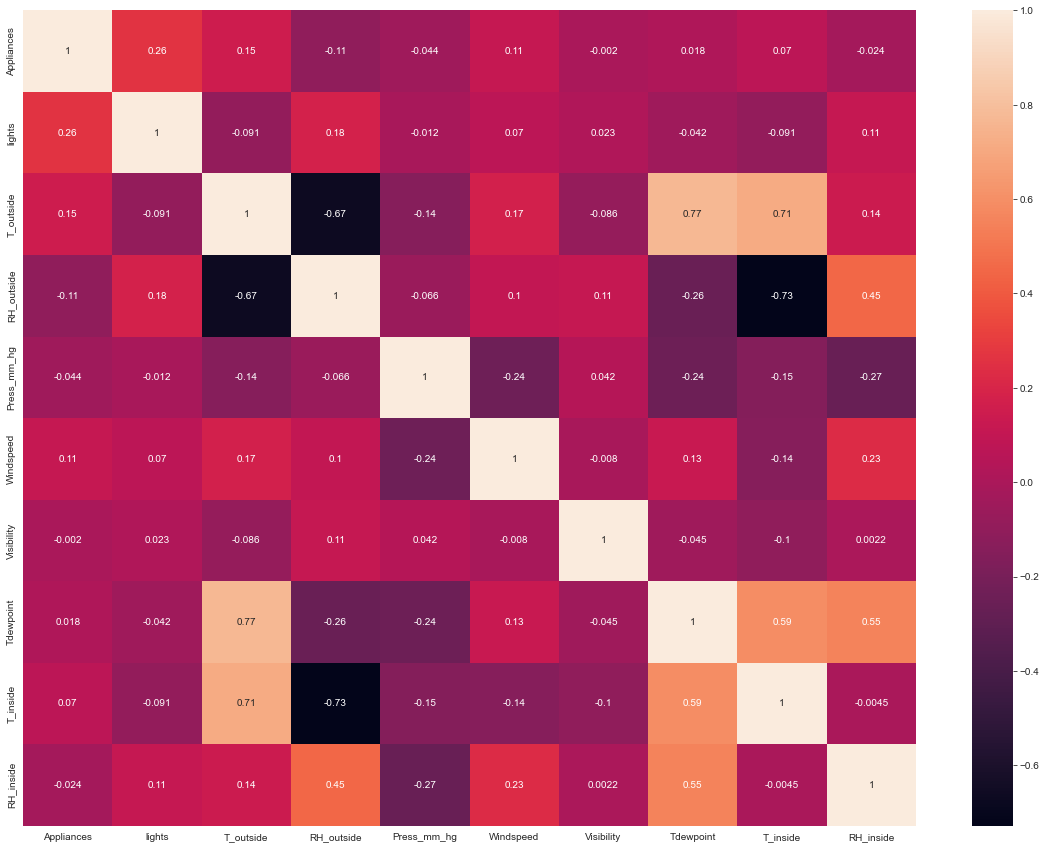

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

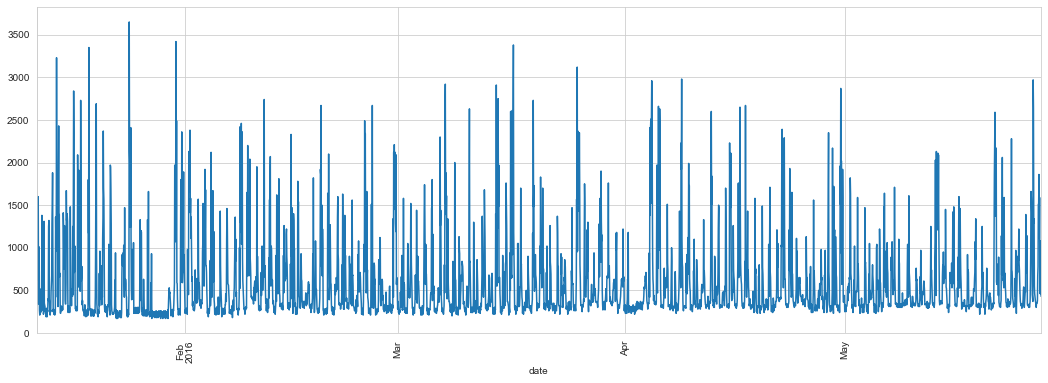

In [17]:
df['Appliances'].plot(figsize=(18,6))
plt.xticks(rotation=90);

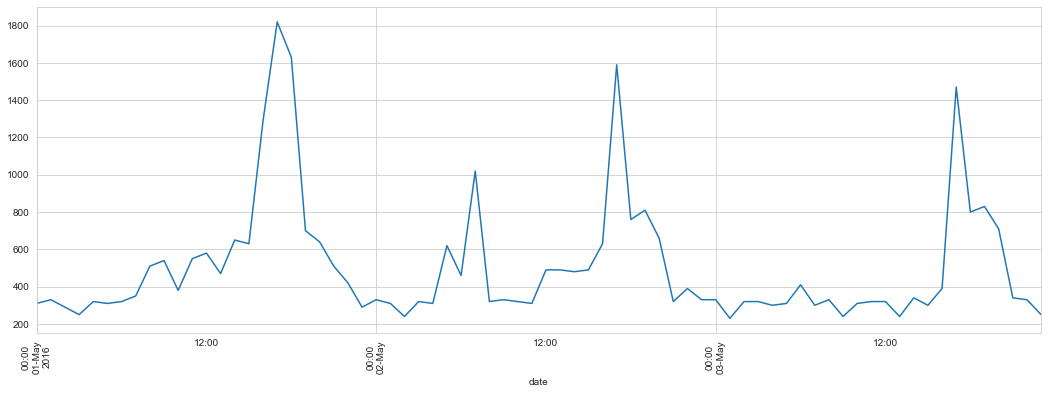

In [18]:
df['Appliances'].loc["2016-05-01 00:00:00" : "2016-05-03 23:00:00"].plot(figsize=(18,6))
plt.xticks(rotation=90);

### Train Test Split

In [19]:
len(df)

3290

In [20]:
# How many rows per day?
# 24
# so it became a sequence of 24 (24 lines of data) in 1 day
# If we didn't convert it to hours, we would have to create a sequence of 144

24

In [21]:
test_days = 7

In [22]:
test_ind = test_days*24

In [23]:
test_ind

168

In [24]:
train = df.iloc[:-test_ind]
test = df.iloc[-test_ind:]

In [25]:
train.shape, test.shape

((3122, 10), (168, 10))

### Scale Data

In [26]:
from sklearn.preprocessing import RobustScaler

In [27]:
df.columns

Index(['Appliances', 'lights', 'T_outside', 'RH_outside', 'Press_mm_hg',
       'Windspeed', 'Visibility', 'Tdewpoint', 'T_inside', 'RH_inside'],
      dtype='object')

In [28]:
f_columns = df.columns[1:]
# We took all columns except Appliances, we separated them as we will scale Appliances separately
# because we only inverse transform it when plotting
f_transformer = RobustScaler()
target_transformer = RobustScaler()

train.loc[:, f_columns] = f_transformer.fit_transform(train[f_columns])
train['Appliances'] = target_transformer.fit_transform(train[['Appliances']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns])
test['Appliances'] = target_transformer.transform(test[['Appliances']])

### Define a Function for Creating Time Steps 

In [29]:
def create_dataset(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: target value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps): # we are subtracting because the last time_steps cannot be processed because there is no value to predict after that
        v = X.iloc[i:(i + time_steps)].values # 1 swipe time_steps(24) assigns packets to Xs
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps]) # Get the 24th index target value
    return np.array(Xs), np.array(ys)

In [30]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Appliances, time_steps)
X_test, y_test = create_dataset(test, test.Appliances, time_steps)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3098, 24, 10) (3098,)
(144, 24, 10) (144,)


In [31]:
y_test

array([ 0.77777778,  0.55555556,  1.22222222,  0.19444444,  1.44444444,
       -0.02777778, -0.08333333, -0.16666667, -0.13888889, -0.11111111,
       -0.19444444, -0.05555556,  0.02777778,  2.13888889,  0.86111111,
        2.33333333,  4.69444444,  1.08333333,  0.69444444,  0.75      ,
        0.58333333,  0.44444444,  3.38888889,  0.97222222,  0.58333333,
        0.91666667,  0.44444444,  0.27777778, -0.02777778, -0.05555556,
       -0.16666667, -0.05555556, -0.16666667, -0.19444444,  0.08333333,
       -0.02777778, -0.08333333, -0.16666667, -0.11111111, -0.16666667,
       -0.08333333,  0.        , -0.08333333, -0.05555556,  0.19444444,
        1.58333333,  5.30555556,  1.02777778,  0.97222222,  0.72222222,
        0.11111111,  0.02777778, -0.05555556, -0.19444444, -0.08333333,
       -0.11111111, -0.13888889, -0.13888889,  0.75      ,  0.16666667,
        1.66666667, -0.08333333, -0.38888889,  0.08333333,  0.66666667,
        1.11111111,  0.94444444,  1.47222222,  1.33333333,  1.33

## Model Building with LSTM

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
n_features = X_train.shape[2]

In [34]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))
# Bidirectional takes data from 1 to 24 and from 24 to 1 (ie backwards).
# model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
# restore_best_weights = True gets 5.score from the end because it is the best score (since patience = 5),
# false gets the final score

In [36]:
model.fit(X_train, y_train, 
          epochs=30, 
          batch_size=24, 
          validation_split=0.3,
#          shuffle=False,
          callbacks=[early_stop])
# loss epochs average , val_loss
# data is in packets of 24, so it doesn't matter if it's mixed

Epoch 1/30
91/91 [==============================] - 4s 21ms/step - loss: 1.4954 - val_loss: 0.9163
Epoch 2/30
91/91 [==============================] - 2s 17ms/step - loss: 1.2023 - val_loss: 0.8855
Epoch 3/30
91/91 [==============================] - 2s 18ms/step - loss: 1.1598 - val_loss: 0.9164
Epoch 4/30
91/91 [==============================] - 2s 19ms/step - loss: 1.1143 - val_loss: 0.8646
Epoch 5/30
91/91 [==============================] - 2s 19ms/step - loss: 1.1012 - val_loss: 0.8975
Epoch 6/30
91/91 [==============================] - 2s 18ms/step - loss: 1.0560 - val_loss: 0.8804
Epoch 7/30
91/91 [==============================] - 2s 18ms/step - loss: 1.0123 - val_loss: 0.8532
Epoch 8/30
91/91 [==============================] - 2s 19ms/step - loss: 0.9977 - val_loss: 0.8735
Epoch 9/30
91/91 [==============================] - 2s 19ms/step - loss: 0.9541 - val_loss: 0.9543
Epoch 10/30
91/91 [==============================] - 2s 18ms/step - loss: 0.9308 - val_loss: 0.8747
Epoch 11/

<AxesSubplot:>

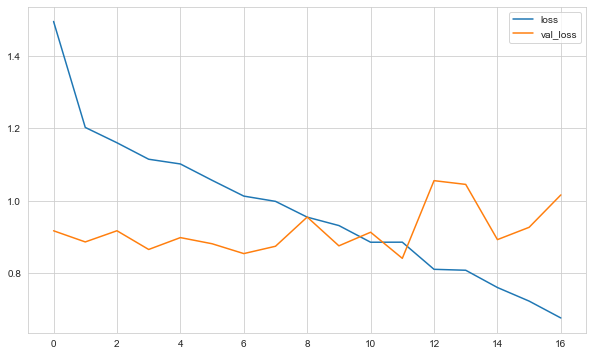

In [37]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

### First way : after each prediction, reel value will be used for next prediction¶

In [40]:
y_pred = model.predict(X_test)

In [41]:
eval_metrics(y_test, y_pred)

r2_score: -0.02001237623120189 
mae: 0.9132549870460305 
mse: 1.7798036792119352 
rmse: 1.3340928300579145


### Inverse Transformation and Compare

In [42]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1)) 
# reshape(1, -1) means that you can adjust how many columns there are in a single row,
# which side is -1, it means adjust yourself according to the other side.
# so we made it a single line
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)
# we make inverse transform to see them all on the graph

In [43]:
test_index = test.iloc[time_steps:].index # We take after 25(24 legnth) because they are predictions we made

pred_test = pd.concat([pd.DataFrame(y_test_inv.reshape(-1, 1)), # made it a single column
                       pd.DataFrame(y_pred_inv)], axis = 1)
pred_test.columns=['test','prediction']
pred_test.index = test_index
pred_test

,test,prediction
date,,
2016-05-21 19:00:00,650.000,1098.249
2016-05-21 20:00:00,570.000,782.465
2016-05-21 21:00:00,810.000,542.913
2016-05-21 22:00:00,440.000,503.470
2016-05-21 23:00:00,890.000,419.061
...,...,...
2016-05-27 14:00:00,610.000,804.066
2016-05-27 15:00:00,460.000,840.323
2016-05-27 16:00:00,810.000,596.305


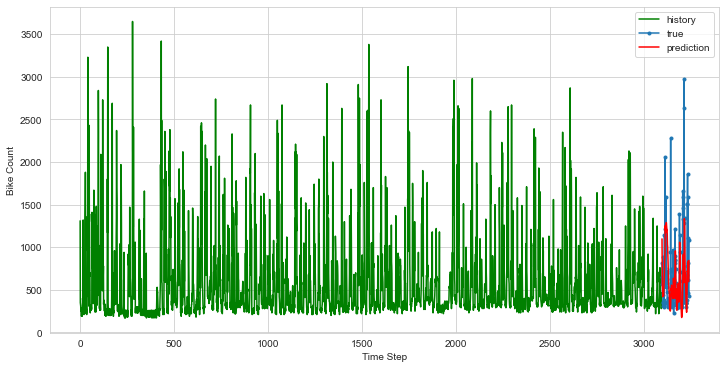

In [44]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

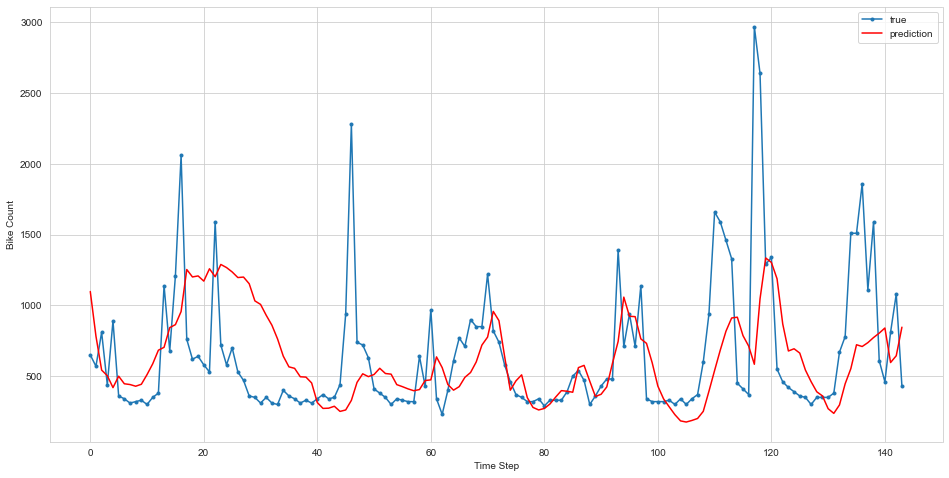

In [45]:
plt.figure(figsize=(16,8))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Second way : after each prediction, result will be used for next prediction

In [46]:
train

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,-0.111,10.500,-0.041,0.525,-2.117,0.723,1.643,0.366,-1.061,1.099
2016-01-11 18:00:00,1.917,15.500,-0.098,0.582,-2.067,0.514,0.000,0.291,-1.066,1.093
2016-01-11 19:00:00,1.861,7.500,-0.143,0.600,-2.018,0.676,0.000,0.239,-0.923,1.478
2016-01-11 20:00:00,1.056,10.500,-0.198,0.577,-1.971,0.676,0.000,0.168,-0.796,1.781
2016-01-11 21:00:00,0.694,7.000,-0.182,0.562,-1.943,0.676,0.000,0.129,-0.638,1.534
...,...,...,...,...,...,...,...,...,...,...
2016-05-20 14:00:00,-0.028,0.000,1.653,-0.580,0.226,0.235,0.000,1.999,1.291,0.934
2016-05-20 15:00:00,-0.250,0.000,1.929,-0.790,0.220,0.279,0.000,1.876,1.342,0.941
2016-05-20 16:00:00,-0.222,0.000,1.988,-1.045,0.208,0.235,0.000,1.777,1.378,0.848


In [47]:
df_fake = test.iloc[:time_steps,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-20 19:00:00,0.000,1.852,-1.082,0.196,0.279,0.000,1.178,1.500,0.975
2016-05-20 20:00:00,0.000,1.296,-0.898,0.201,-0.115,0.000,1.151,1.423,0.790
2016-05-20 21:00:00,0.500,0.999,-0.598,0.209,-0.559,0.000,1.384,1.367,0.767
2016-05-20 22:00:00,0.500,0.873,-0.435,0.220,-0.721,0.000,1.482,1.347,0.828
2016-05-20 23:00:00,0.000,0.890,-0.289,0.208,-0.603,-0.561,1.631,1.321,0.889
2016-05-21 00:00:00,0.000,0.864,-0.193,0.180,-0.324,-1.398,1.829,1.301,0.941
2016-05-21 01:00:00,0.000,0.892,-0.131,0.143,-0.045,-0.857,1.833,1.286,0.964
2016-05-21 02:00:00,0.000,0.852,-0.123,0.104,0.117,0.000,1.822,1.276,0.977
2016-05-21 03:00:00,0.000,0.773,-0.107,0.076,0.117,-0.561,1.799,1.265,0.987


In [48]:
reel = np.array(test.iloc[:time_steps,:1])
reel.reshape((1,-1))[0]

array([ 0.05555556,  0.13888889,  0.05555556, -0.13888889, -0.27777778,
       -0.22222222, -0.16666667, -0.08333333, -0.22222222, -0.08333333,
       -0.16666667, -0.02777778, -0.08333333,  2.44444444,  4.13888889,
        5.36111111,  6.16666667,  2.77777778,  4.69444444,  4.02777778,
        5.        ,  0.63888889,  0.55555556,  1.05555556])

In [49]:
df_fake.shape

(24, 9)

In [50]:
df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1])).shape

(24, 1, 9)

In [51]:
predictions_scaled = []

first_eval_batch = train.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, n_features))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(time_steps):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0])
    new = features[i][0].tolist()
    new.insert(0,current_pred[0][0])
    new = np.array(new).reshape(1,1,n_features)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis=1)

In [52]:
predictions_scaled

[array([0.6786374], dtype=float32),
 array([0.49024928], dtype=float32),
 array([0.31641826], dtype=float32),
 array([0.25890917], dtype=float32),
 array([0.18371323], dtype=float32),
 array([-0.03719784], dtype=float32),
 array([-0.2560818], dtype=float32),
 array([-0.3550583], dtype=float32),
 array([-0.3361904], dtype=float32),
 array([-0.30900276], dtype=float32),
 array([-0.2105971], dtype=float32),
 array([-0.07608182], dtype=float32),
 array([0.06238484], dtype=float32),
 array([0.177358], dtype=float32),
 array([0.32726842], dtype=float32),
 array([0.6612679], dtype=float32),
 array([1.0769005], dtype=float32),
 array([1.5840161], dtype=float32),
 array([1.8975803], dtype=float32),
 array([2.3298748], dtype=float32),
 array([2.7733524], dtype=float32),
 array([3.1706302], dtype=float32),
 array([3.4687934], dtype=float32),
 array([3.566793], dtype=float32)]

In [53]:
reel

array([[ 0.05555556],
       [ 0.13888889],
       [ 0.05555556],
       [-0.13888889],
       [-0.27777778],
       [-0.22222222],
       [-0.16666667],
       [-0.08333333],
       [-0.22222222],
       [-0.08333333],
       [-0.16666667],
       [-0.02777778],
       [-0.08333333],
       [ 2.44444444],
       [ 4.13888889],
       [ 5.36111111],
       [ 6.16666667],
       [ 2.77777778],
       [ 4.69444444],
       [ 4.02777778],
       [ 5.        ],
       [ 0.63888889],
       [ 0.55555556],
       [ 1.05555556]])

In [54]:
eval_metrics(reel, predictions_scaled)

r2_score: 0.026790014750898705 
mae: 1.4565857553130224 
mse: 4.462922418517707 
rmse: 2.112562997526395


### Inverse Transformation and Compare

In [55]:
predictions = target_transformer.inverse_transform(predictions_scaled)
reel = target_transformer.inverse_transform(reel)

In [56]:
compare = pd.DataFrame(data = reel, index = test.index[:time_steps], columns = ["reel"])
compare["prediction"] = predictions
compare

,reel,prediction
date,,
2016-05-20 19:00:00,390.000,614.309
2016-05-20 20:00:00,420.000,546.490
2016-05-20 21:00:00,390.000,483.911
2016-05-20 22:00:00,320.000,463.207
2016-05-20 23:00:00,270.000,436.137
2016-05-21 00:00:00,290.000,356.609
2016-05-21 01:00:00,310.000,277.811
2016-05-21 02:00:00,340.000,242.179
2016-05-21 03:00:00,290.000,248.971


<AxesSubplot:xlabel='date'>

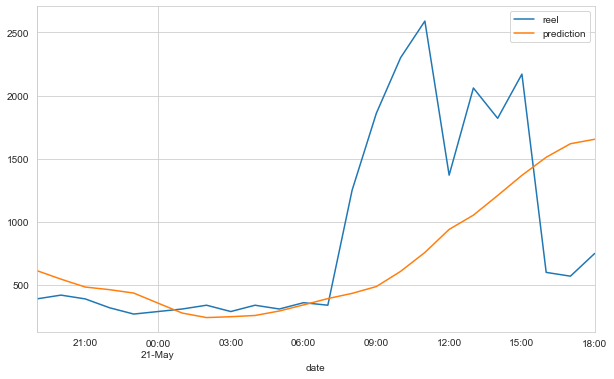

In [57]:
compare.plot()

## Retrain and Forecasting with Full Data

### Scale full data

In [58]:
df_scaled = df.copy()

In [59]:
f_columns = df_scaled.columns[1:]

f_transformer = RobustScaler()
target_transformer = RobustScaler()

df_scaled.loc[:, f_columns] = f_transformer.fit_transform(df_scaled[f_columns])
df_scaled['Appliances'] = target_transformer.fit_transform(df_scaled[['Appliances']])

In [60]:
df_scaled

,Appliances,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,,
2016-01-11 17:00:00,-0.139,10.500,-0.092,0.546,-2.233,0.757,1.643,0.290,-1.038,1.027
2016-01-11 18:00:00,1.889,15.500,-0.146,0.601,-2.181,0.538,0.000,0.221,-1.043,1.022
2016-01-11 19:00:00,1.833,7.500,-0.188,0.619,-2.129,0.708,0.000,0.173,-0.910,1.392
2016-01-11 20:00:00,1.028,10.500,-0.239,0.596,-2.080,0.708,0.000,0.107,-0.790,1.682
2016-01-11 21:00:00,0.667,7.000,-0.225,0.581,-2.051,0.708,0.000,0.072,-0.643,1.445
...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.639,0.500,2.403,-1.016,-0.030,-0.462,-2.255,1.785,2.024,0.914
2016-05-27 15:00:00,0.222,0.000,2.496,-1.016,-0.043,-0.462,-2.224,1.746,2.019,0.833
2016-05-27 16:00:00,1.194,0.000,2.478,-1.016,-0.072,-0.339,-2.132,1.749,2.043,0.931


Let's devide dataset as "full" and "val". We can think about this "val" data as the weather forecast of next days.

In [61]:
val_size = 24
val = df_scaled.iloc[-val_size:]
full = df_scaled.iloc[:-val_size]
print(len(full), len(val))

3266 24


### reshape to [samples, time_steps, n_features]

In [62]:
X, y = create_dataset(full, full.Appliances, time_steps)

print(X.shape, y.shape)

(3242, 24, 10) (3242,)


### Create Final model with full data

In [63]:
model = Sequential()

model.add(Bidirectional(LSTM(units=100, input_shape=(time_steps, n_features))))

#model.add(Dropout(rate=0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')

In [64]:
model.fit(X, y, 
          epochs=15, 
          batch_size=24, 
         # shuffle=False
         )

Epoch 1/15
136/136 [==============================] - 4s 15ms/step - loss: 1.3320
Epoch 2/15
136/136 [==============================] - 2s 16ms/step - loss: 1.1274
Epoch 3/15
136/136 [==============================] - 2s 17ms/step - loss: 1.0617
Epoch 4/15
136/136 [==============================] - 2s 17ms/step - loss: 1.0288
Epoch 5/15
136/136 [==============================] - 2s 16ms/step - loss: 1.0093
Epoch 6/15
136/136 [==============================] - 2s 15ms/step - loss: 0.9725
Epoch 7/15
136/136 [==============================] - 2s 15ms/step - loss: 0.9383
Epoch 8/15
136/136 [==============================] - 2s 16ms/step - loss: 0.9129
Epoch 9/15
136/136 [==============================] - 2s 16ms/step - loss: 0.8842
Epoch 10/15
136/136 [==============================] - 3s 19ms/step - loss: 0.8683
Epoch 11/15
136/136 [==============================] - 2s 18ms/step - loss: 0.8237
Epoch 12/15
136/136 [==============================] - 2s 17ms/step - loss: 0.7843
Epoch 13/15
1

<AxesSubplot:>

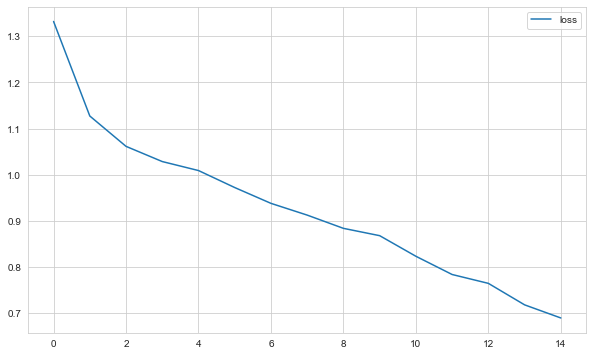

In [65]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### forecasting

In [66]:
df_fake = val.iloc[:,1:]
df_fake

,lights,T_outside,RH_outside,Press_mm_hg,Windspeed,Visibility,Tdewpoint,T_inside,RH_inside
date,,,,,,,,,
2016-05-26 19:00:00,0.000,2.011,-1.016,-0.060,-0.170,-0.786,1.134,1.862,0.749
2016-05-26 20:00:00,4.500,1.634,-1.006,-0.048,-0.170,-0.867,1.237,1.838,1.143
2016-05-26 21:00:00,4.000,1.311,-0.842,-0.018,-0.047,-0.092,1.368,1.762,0.990
2016-05-26 22:00:00,6.000,1.111,-0.704,0.000,0.123,2.794,1.444,1.738,0.974
2016-05-26 23:00:00,5.500,0.996,-0.619,0.000,0.000,2.886,1.403,1.695,0.954
2016-05-27 00:00:00,1.000,0.932,-0.513,-0.008,-0.292,2.764,1.355,1.671,0.966
2016-05-27 01:00:00,0.000,0.910,-0.465,-0.028,-0.462,2.693,1.338,1.633,0.959
2016-05-27 02:00:00,0.000,0.875,-0.401,-0.036,-0.585,2.641,1.334,1.605,0.974
2016-05-27 03:00:00,0.000,0.833,-0.336,-0.043,-0.389,2.163,1.375,1.576,0.983


In [67]:
reel = np.array(val.iloc[:,:1])
reel.reshape((1,-1))[0]

array([ 2.66666667,  0.47222222,  0.22222222,  0.11111111,  0.02777778,
       -0.05555556, -0.08333333, -0.22222222, -0.08333333, -0.08333333,
       -0.08333333,  0.        ,  0.80555556,  1.11111111,  3.13888889,
        3.13888889,  4.11111111,  2.02777778,  3.36111111,  0.63888889,
        0.22222222,  1.19444444,  1.94444444,  0.13888889])

### First way : after each prediction, reel value will be use for next prediction¶

In [68]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,reel[i][0])
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [69]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.08373188287544653 
mae: 1.0148086283976834 
mse: 1.8781979892072833 
rmse: 1.3704736368158577


In [70]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[1229.0063 , 1024.886  ,  562.4151 ,  643.2315 ,  627.2758 ,
         560.79004,  417.3425 ,  316.3225 ,  235.77228,  208.87456,
         160.66922,  191.51411,  230.98303,  403.19763,  567.7819 ,
         779.11743,  759.1814 ,  766.81335,  579.7738 ,  465.18066,
         395.5473 ,  408.9909 ,  945.4059 , 1443.4929 ]], dtype=float32)

In [71]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [72]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

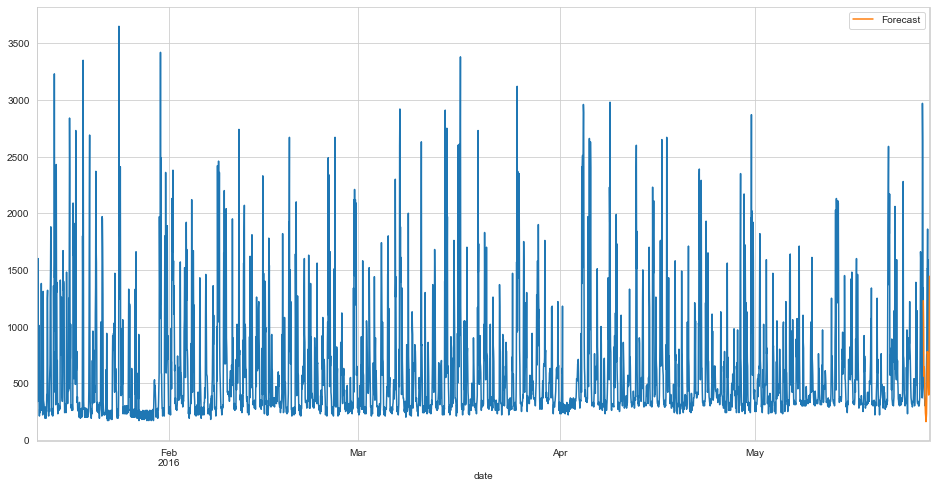

In [73]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406699.0, 406770.0)

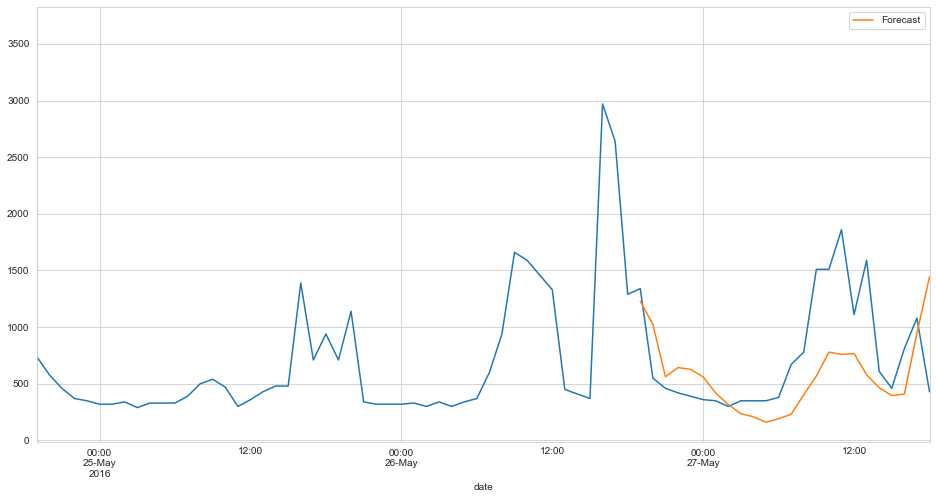

In [74]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')

### Second way : after each prediction, result will be use for next prediction

In [75]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 24

first_eval_batch = full.values[-time_steps:]
current_batch = first_eval_batch.reshape((1, time_steps, full.shape[1]))
features = df_fake.values.reshape((df_fake.shape[0], 1, df_fake.shape[1]))

for i in range(periods):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)[0][0]
    
    # store prediction
    forecast.append(current_pred) 
    new = features[i][0].tolist()
    new.insert(0,current_pred)
    new = np.array(new).reshape(1,1,full.shape[1])
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], new, axis = 1)

In [76]:
eval_metrics(reel.reshape((1,-1))[0], forecast)

r2_score: -0.9624640415281083 
mae: 1.421453464621057 
mse: 3.4011143115121514 
rmse: 1.8442110268383474


In [77]:
forecast = target_transformer.inverse_transform(np.array(forecast).reshape(1,-1))
forecast

array([[1229.0063  ,  999.04816 ,  648.77686 ,  681.1201  ,  684.95984 ,
         645.186   ,  519.0628  ,  378.45956 ,  275.10565 ,  212.69377 ,
         147.89877 ,  154.99957 ,  176.90968 ,  251.59712 ,  367.74673 ,
         428.62894 ,  347.10806 ,  217.19037 ,   49.499786,  -31.988556,
         148.10222 ,  217.57011 ,  377.70648 ,  794.51965 ]],
      dtype=float32)

In [78]:
forecast_index = pd.date_range(start = '2016-05-26 19:00:00', periods = periods, freq = 'H')

In [79]:
forecast_df = pd.DataFrame(data = forecast.reshape(-1, 1), index = forecast_index, columns = ['Forecast'])

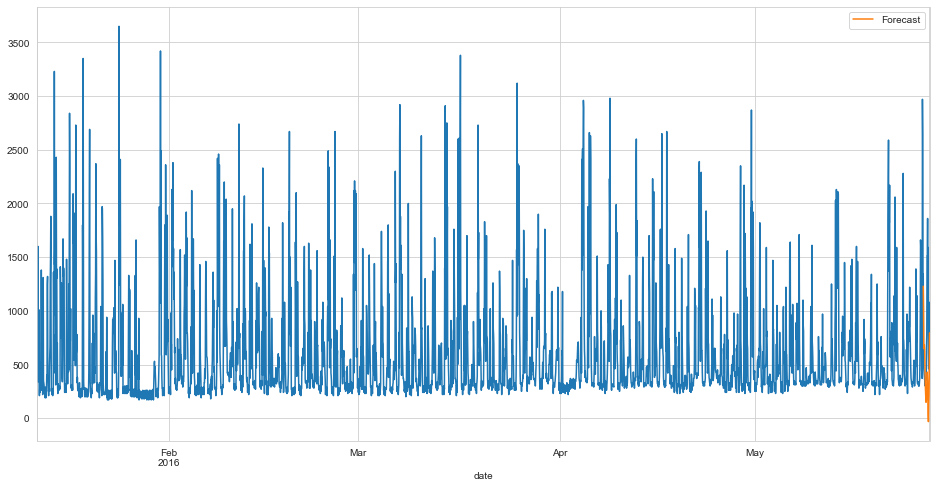

In [80]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(406699.0, 406770.0)

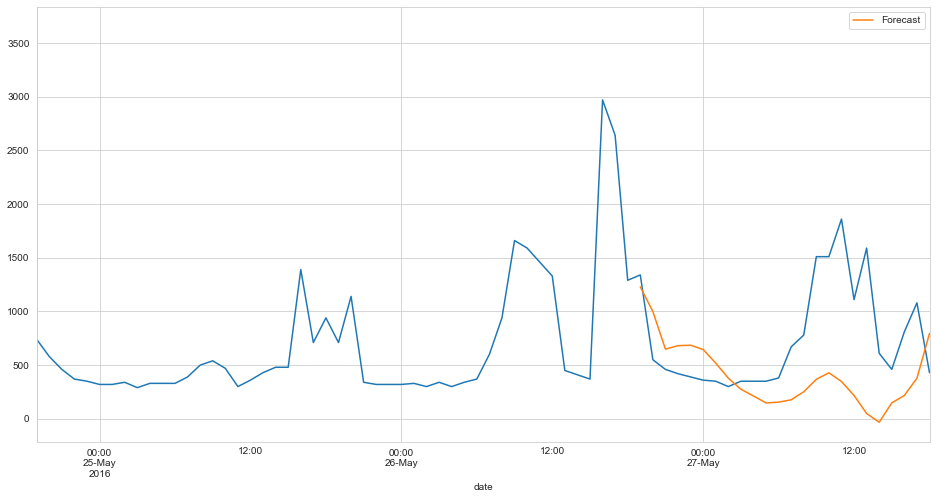

In [81]:
ax = df["Appliances"].plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2016-05-24 19:00:00', '2016-05-27 18:00:00')